In [1]:
import matplotlib.pyplot as plt
import vaex
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
merged_data = vaex.from_csv('TSLA_merged_data.csv', convert=True, chunk_size=5_000_000, low_memory=False)
merged_data = merged_data.to_pandas_df()
merged_data['Date'] = merged_data['Date'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
merged_data = merged_data.set_index('Date', drop=False)
merged_data

,Date,negative,neutral,positive,sentiment_vader,Open,High,Low,Close,Adj Close,Volume,daily_returns,total_msgs,TSLA
Date,,,,,,,,,,,,,,
2018-01-01,2018-01-01,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2018-01-02,2018-01-02,1.0,1.0,1.0,0.000000,62.400002,64.421997,62.200001,64.106003,64.106003,21761000.0,NaN,3.0,NaN
2018-01-03,2018-01-03,0.0,1.0,5.0,1.000000,64.199997,65.050003,63.110001,63.450001,63.450001,22607500.0,-1.023308,10.0,NaN
2018-01-04,2018-01-04,4.0,1.0,3.0,-0.142857,62.574001,63.709999,61.136002,62.924000,62.924000,49731500.0,-0.829001,10.0,NaN
2018-01-05,2018-01-05,5.0,6.0,3.0,-0.250000,63.324001,63.448002,62.400002,63.316002,63.316002,22956000.0,0.622977,11.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-02,2018-02-02,NaN,NaN,NaN,NaN,69.688004,70.389999,68.101997,68.750000,68.750000,18524000.0,-89.900993,NaN,NaN
2018-02-26,2018-02-26,NaN,NaN,NaN,NaN,70.699997,71.800003,70.472000,71.484001,71.484001,21700000.0,3.976729,NaN,NaN
2018-01-14,2018-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0


In [3]:
trends_pos = merged_data[(merged_data.sentiment_vader * merged_data.daily_returns > 0)]
print("positive correlation:", trends_pos.size/merged_data.size)

positive correlation: 0.34509803921568627


In [4]:
trends_neg = merged_data[(merged_data.sentiment_vader * merged_data.daily_returns < 0)]
print("negative correlation:", trends_neg.size/merged_data.size)

negative correlation: 0.31607843137254904


In [5]:
trends_pos_pre2020 = trends_pos[(trends_pos.index < "2020-01-01")]
print("positive correlation:", trends_pos_pre2020.size/merged_data.size)

positive correlation: 0.18823529411764706


In [6]:
trends_pos_post2020 = trends_pos[(trends_pos.index > "2020-01-01")]
print("positive correlation:", trends_pos_post2020.size/merged_data.size)

positive correlation: 0.1568627450980392


In [7]:
trends_neg_pre2020 = trends_neg[(trends_neg.index > "2020-01-01")]
print("negative correlation:", trends_neg_pre2020.size/merged_data.size)

negative correlation: 0.1380392156862745


In [8]:
trends_neg_post2020 = trends_neg[(trends_neg.index > "2020-01-01")]
print("negative correlation:", trends_neg_post2020.size/merged_data.size)

negative correlation: 0.1380392156862745


In [9]:
merged_data.loc[:,'sentiment_abs']= merged_data['sentiment_vader'].abs()
merged_data.loc[:,'daily_returns_abs']= merged_data['daily_returns'].abs()
sentiment_impact = merged_data.sort_values('sentiment_abs', ascending=False)
sentiment_impact = sentiment_impact[sentiment_impact.daily_returns_abs > 2]
sentiment_impact = sentiment_impact[sentiment_impact.sentiment_abs >.5]
sentiment_impact = sentiment_impact[(sentiment_impact.sentiment_vader * sentiment_impact.daily_returns > 0)]
sentiment_impact.sort_values('daily_returns_abs', ascending=False)

,Date,negative,neutral,positive,sentiment_vader,Open,High,Low,Close,Adj Close,Volume,daily_returns,total_msgs,TSLA,sentiment_abs,daily_returns_abs
Date,,,,,,,,,,,,,,,,
2019-01-04,2019-01-04,4.0,3.0,14.0,0.555556,61.200001,63.599998,60.546001,63.537998,63.537998,36970500.0,5.769742,32.0,NaN,0.555556,5.769742
2018-12-28,2018-12-28,4.0,12.0,13.0,0.529412,64.620003,67.248001,63.681999,66.774002,66.774002,49695000.0,5.611616,30.0,NaN,0.529412,5.611616
2019-01-07,2019-01-07,5.0,10.0,18.0,0.565217,64.344002,67.348000,63.549999,66.991997,66.991997,37756000.0,5.436115,41.0,NaN,0.565217,5.436115
2018-06-11,2018-06-11,2.0,12.0,10.0,0.666667,64.501999,66.931999,64.500000,66.419998,66.419998,65917500.0,4.545735,22.0,NaN,0.666667,4.545735
2019-09-05,2019-09-05,2.0,8.0,8.0,0.600000,44.500000,45.959999,44.169998,45.916000,45.916000,36976500.0,4.032986,18.0,NaN,0.600000,4.032986
2019-07-10,2019-07-10,10.0,19.0,32.0,0.523810,46.830002,47.787998,46.627998,47.784000,47.784000,45728500.0,3.851168,74.0,NaN,0.523810,3.851168
2018-02-07,2018-02-07,3.0,2.0,10.0,0.538462,67.797997,69.199997,67.132004,69.000000,69.000000,34846000.0,3.302694,23.0,NaN,0.538462,3.302694
2019-08-29,2019-08-29,1.0,3.0,7.0,0.750000,43.799999,44.680000,43.599998,44.341999,44.341999,25897500.0,2.838719,15.0,NaN,0.750000,2.838719
2019-03-27,2019-03-27,5.0,14.0,19.0,0.583333,53.750000,55.074001,53.636002,54.966000,54.966000,43896000.0,2.636589,43.0,NaN,0.583333,2.636589


In [10]:
percent_change = merged_data.sort_values('daily_returns_abs', ascending=False)
percent_change = percent_change[percent_change.daily_returns_abs > 10]
percent_change = percent_change[percent_change.total_msgs > 1000]
percent_change.sort_values('daily_returns_abs', ascending=False)

,Date,negative,neutral,positive,sentiment_vader,Open,High,Low,Close,Adj Close,Volume,daily_returns,total_msgs,TSLA,sentiment_abs,daily_returns_abs
Date,,,,,,,,,,,,,,,,
2020-09-08,2020-09-08,702.0,817.0,834.0,0.085938,356.000000,368.739990,329.880005,330.209991,330.209991,115465700.0,-21.062826,2370.0,NaN,0.085938,21.062826
2020-02-03,2020-02-03,421.0,511.0,507.0,0.092672,134.738007,157.227997,134.703995,156.000000,156.000000,235325000.0,19.894863,1435.0,NaN,0.092672,19.894863
2021-03-09,2021-03-09,307.0,517.0,424.0,0.160055,608.179993,678.090027,595.210022,673.580017,673.580017,67523300.0,19.641211,1155.0,NaN,0.160055,19.641211
2020-02-05,2020-02-05,703.0,867.0,895.0,0.120150,164.651993,169.195999,140.822006,146.940002,146.940002,242119000.0,-17.175839,2493.0,NaN,0.120150,17.175839
2020-02-04,2020-02-04,952.0,1088.0,1174.0,0.104421,176.591995,193.798004,166.776001,177.412003,177.412003,304694000.0,13.725643,3300.0,NaN,0.104421,13.725643
2020-07-06,2020-07-06,554.0,841.0,781.0,0.170037,255.337997,275.558014,253.207993,274.316010,274.316010,102849500.0,13.479397,2116.0,NaN,0.170037,13.479397
2020-08-12,2020-08-12,423.0,670.0,564.0,0.142857,294.000000,317.000000,287.000000,310.951996,310.951996,109147000.0,13.123643,1551.0,NaN,0.142857,13.123643
2020-09-14,2020-09-14,328.0,507.0,389.0,0.085077,380.950012,420.000000,373.299988,419.619995,419.619995,83020600.0,12.583171,1106.0,NaN,0.085077,12.583171
2020-08-31,2020-08-31,1037.0,1581.0,1402.0,0.149651,444.609985,500.140015,440.109985,498.320007,498.320007,118374400.0,12.568902,3841.0,NaN,0.149651,12.568902


In [11]:
relevant_dates = pd.concat([sentiment_impact, percent_change])
relevant_dates

dates = relevant_dates['Date'].tolist()

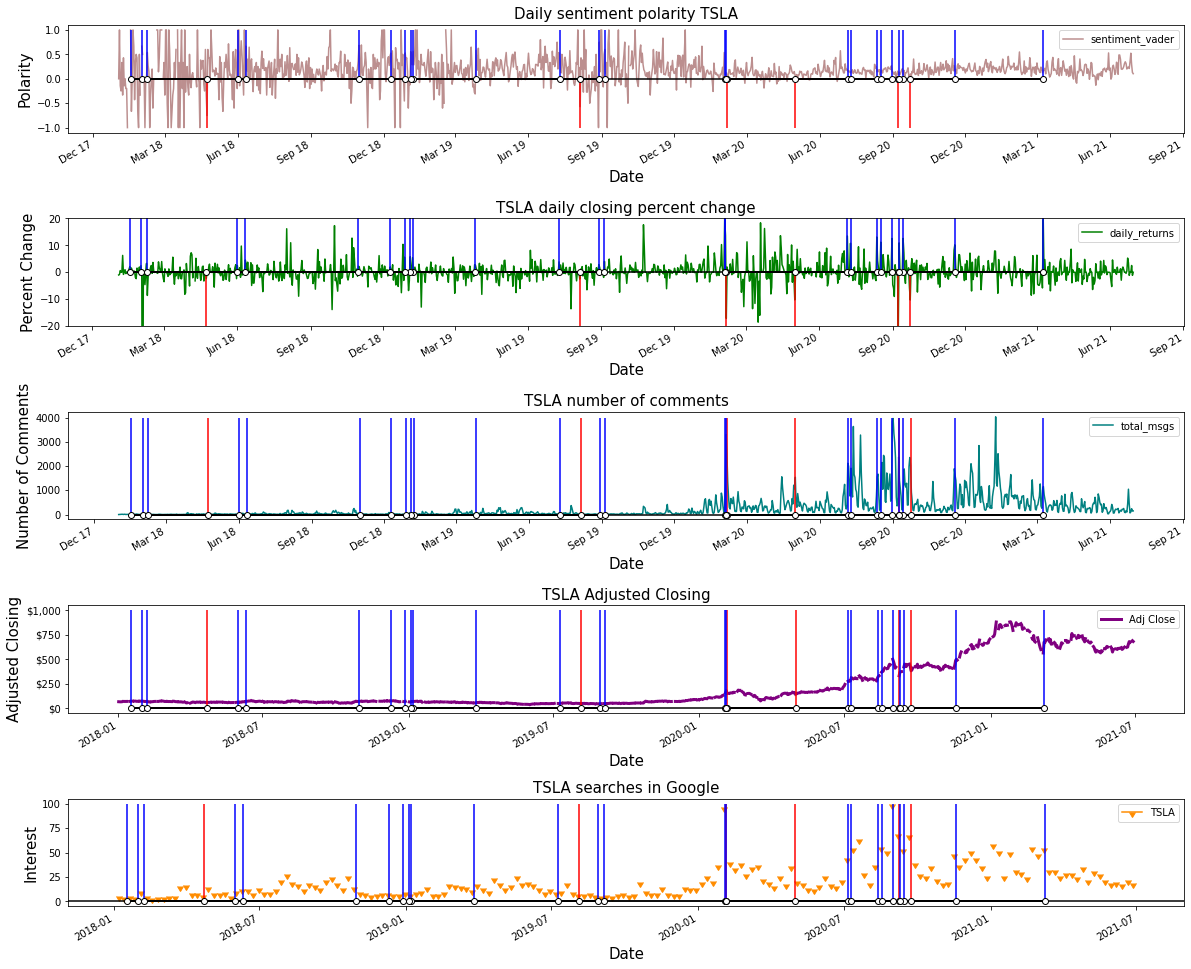

In [12]:


fig, (ax , ax1, ax2, ax3, ax4) = plt.subplots(5, 1, figsize=(20,18))
fig.subplots_adjust(hspace = 0.8)

merged_data.plot.line( y = 'sentiment_vader',color='rosybrown', ax = ax, use_index=True)
merged_data.plot.line( y = 'daily_returns',color='green', ax = ax1, use_index=True)
merged_data.plot.line( y = 'total_msgs',color='teal', ax = ax2)
merged_data.plot.line( y = 'Adj Close',color='purple', ax = ax3, linewidth=3)
merged_data.plot.line( y = 'TSLA',color='darkorange', ax = ax4, marker=11 )

#black line in return = 0
plt.axhline(y=0.0, color='black')

ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)

ax1.xaxis.label.set_size(15)
ax1.yaxis.label.set_size(15)

ax2.xaxis.label.set_size(15)
ax2.yaxis.label.set_size(15)

ax3.xaxis.label.set_size(15)
ax3.yaxis.label.set_size(15)

ax4.xaxis.label.set_size(15)
ax4.yaxis.label.set_size(15)

ax.set( xlabel='Date', ylabel='Polarity', title='Daily sentiment polarity TSLA' )
ax1.set( xlabel='Date', ylabel='Percent Change', title='TSLA daily closing percent change')
ax2.set( xlabel='Date', ylabel='Number of Comments', title='TSLA number of comments')
ax3.set( xlabel='Date', ylabel='Adjusted Closing', title='TSLA Adjusted Closing')
ax4.set( xlabel='Date', ylabel='Interest', title='TSLA searches in Google')

ax3.yaxis.set_major_formatter('${x:,.0f}')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=3))

ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %y"))
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b %y"))
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%b %y"))

#ax1.set_xticklabels([x.strftime("%b %y") for x in merged_data.index], rotation=45)
    #    ax.set_title('Monthly Balance')
#ax.title.set_size(15)
#ax1.set_title('TSLA daily closing percent change')
ax1.set_ylim(-20,20)
ax.title.set_size(15)
ax1.title.set_size(15)
ax2.title.set_size(15)
ax3.title.set_size(15)
ax4.title.set_size(15)

# Choose some nice levels for milestones
levels0 = [1 if x >= 0 else -1 for x in relevant_dates.daily_returns]
levels1 = [20 if x >= 0 else -20 for x in relevant_dates.daily_returns]
# levels2 = [4000 if x >= 0 else -4000 for x in relevant_dates.daily_returns]
# levels3 = [800 if x >= 0 else -800 for x in relevant_dates.daily_returns]
# levels4 = [100 if x >= 0 else -100 for x in relevant_dates.daily_returns]

colors = ['blue' if x >= 0 else 'red' for x in relevant_dates.daily_returns]

# Add vertical lines for milestones
ax.vlines(dates, 0, levels0, color=colors)  # The vertical stems.
ax.plot(dates, np.zeros_like(dates), "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.

ax1.vlines(dates, 0, levels1, color=colors)  # The vertical stems.
ax1.plot(dates, np.zeros_like(dates), "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.

ax2.vlines(dates, 0, 4000, color=colors)  # The vertical stems.
ax2.plot(dates, np.zeros_like(dates), "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.

ax3.vlines(dates, 0, 1000, color=colors)  # The vertical stems.
ax3.plot(dates, np.zeros_like(dates), "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.

ax4.vlines(dates, 0, 100, color=colors)  # The vertical stems.
ax4.plot(dates, np.zeros_like(dates), "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.